In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import io
import matplotlib.pyplot as plt
%matplotlib inline
import os
import missingno as msno
import math

The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

In [2]:
path = "E:\prepleaf\Projects\Project3\Datasets"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
all_months_data = pd.DataFrame()

In [3]:
files# giving file list 

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_months_data# empty dataframe

""


In [6]:
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

In [10]:
all_months_data.shape
# earlier it was empty dataframe now all current _data came inside this

(186850, 6)

In [11]:
all_months_data.to_csv("all_data_copy.csv", index=False)

In [2]:
all_data = pd.read_csv("all_data_copy.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


As we can see above in both describe(count row) & info(Non-Null Count Column) section the total number of rows they are reading 
is 186305, but all_data have 186850 rows this means we have some inconsistency. And here data types of all column is object(str) even Order ID, Quantity Ordered, and Price Each should be numbers and Order Date should be a date type.

In [5]:
# all_data.isnull()
all_data.isnull().sum()
#we have some null values and interestingly all the features have same number of null values. So here case can be that all 
#545 rows have null in all columns so we need to check that too 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

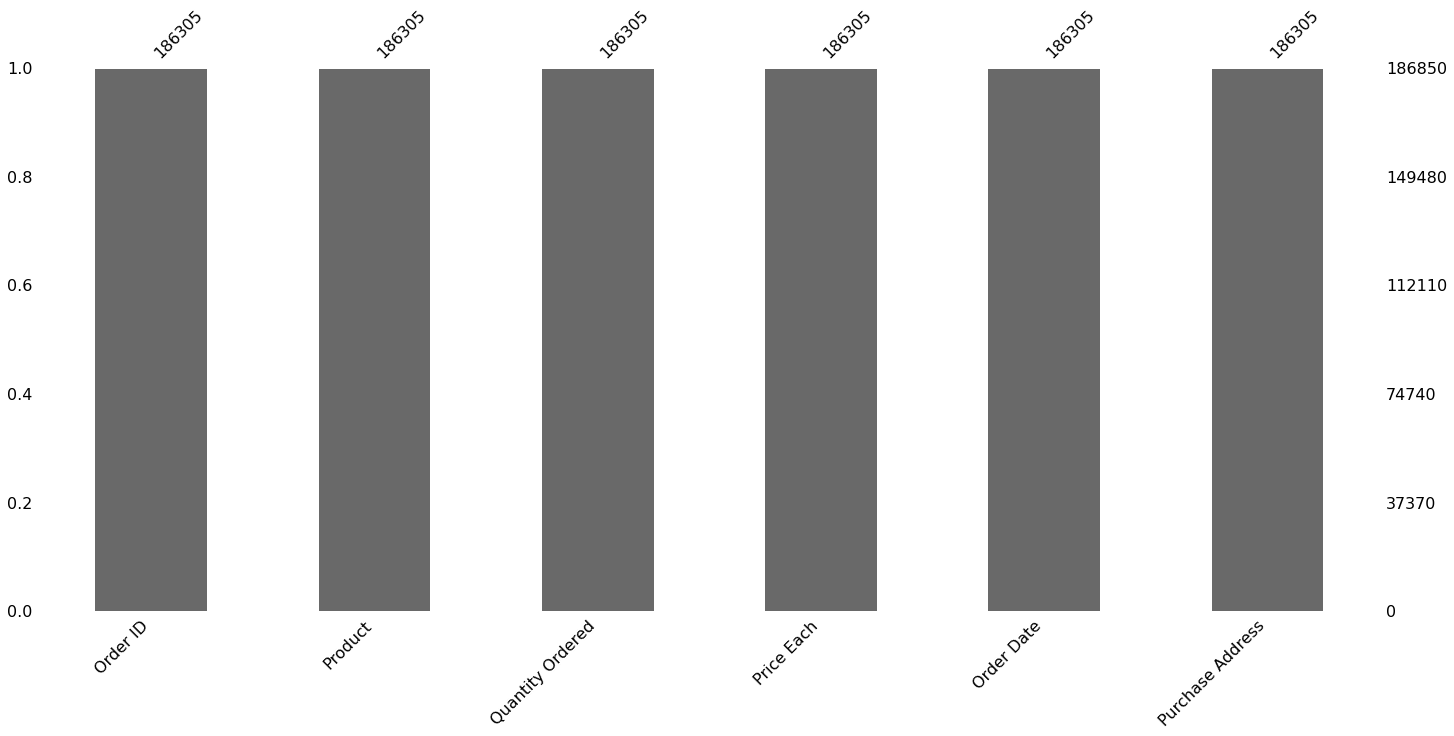

In [6]:
msno.bar(all_data)
# 186305 out of 186850 

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations. 
Visualization of missing values import missingno as msno msno.matrix(life_expectancy) msno.heatmap(life_expectancy) msno.bar(life_expectancy)

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df)
# Here we're trying to get all those observations who have Null values in all the features 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data = all_data.dropna(how='all')
all_data
# Here we're droping all those observations who have Null values in all the features 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
all_data.isnull().sum() # Checking for ant null value

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Here we don't have a sales column will add one (Quantity Ordered * Price Each) and also add a month column to see how sales are
doing for different months. And by adding a City column we also able to do sales analysis for different cities too. 


In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# As we discussed above Order Date is not in date form so 1st convert it to a date form. So we are getting some error saying 
# "Unknown string format: Order Date" it means we have some problematic row so let's see into it then will come back and do the 
# conversion.

<ipython-input-14-bb8da2e61e6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [11]:
Date_error = all_data[all_data['Order Date']=='Order Date']
Date_error
# So we have 355 rows with not usefull values so we need to drop these rows and then we can convert date column type

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data = all_data[all_data['Order Date']!='Order Date']
# droping rows with columns name as value

In [13]:
all_data.shape
# earlier it was 186305 now it is 185950

(185950, 6)

In [15]:
#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],format='%m/%d/%Y %H:%M')
#all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month, in this str to date time then getting month
#all_data['Month'] = all_data['Order Date'].str[0:2], in case of string
all_data['Month'] = all_data['Order Date'].dt.month

<ipython-input-15-d041dbc4a4fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].dt.month


In [16]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [20]:
# all_data['Month'] = all_data['Month'].astype('int32')
# some Or error
# Or_error = all_data[all_data['Order Date'].str[0:2]=='Or']
# all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
# droping rows with columns name as value

Similar to Order Date here we're changing type of Quantity Ordered and Price Each cause they also not in numbers.

In [17]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

<ipython-input-17-81603091079b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-17-81603091079b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


Adding sales Column with the combination of Quantity Ordered and Price Each.

In [19]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
# all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

<ipython-input-19-dd266e2ff961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']


In [20]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


Now we have months and sales, so we can checkout what is the sales over different months 

In [21]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


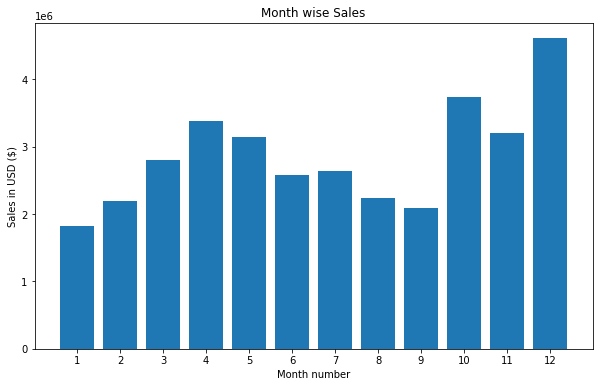

In [22]:
months = range(1,13)

plt.figure(figsize=(10,6))
plt.title('Month wise Sales')
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

on Y-axis numbers are like 1,2,3 but they are in multiple of 10^6, and last 3 months have high sales due to the fact of holidays and in april too.

In [23]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

<ipython-input-23-01eadea471b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))


strip() is an inbuilt function in Python programming language that returns a copy of the string with both leading and trailing characters removed (based on the string argument passed). 

string.strip([chars]), chars - a string specifying the set of characters to be removed. 
If the optional chars parameter is not given, all leading and trailing whitespaces are removed from the string.

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


As we can see above that we got City colum too, So let's get on sales analysis City wise.

In [25]:
all_data.groupby(['City']).sum()
# San Francisco CA with highest sales.

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [26]:
all_data.City.unique()
# As we can see here order of city is different from above table

array(['Dallas TX', 'Boston MA', 'Los Angeles CA', 'San Francisco CA',
       'Seattle WA', 'Atlanta GA', 'New York City NY', 'Portland OR',
       'Austin TX', 'Portland ME'], dtype=object)

In [27]:
all_data.City.value_counts()
# San Francisco CA counts are maximum means it coming in alot of observation and hence it has high sales

San Francisco CA    44732
Los Angeles CA      29605
New York City NY    24876
Boston MA           19934
Atlanta GA          14881
Dallas TX           14820
Seattle WA          14732
Portland OR         10010
Austin TX            9905
Portland ME          2455
Name: City, dtype: int64

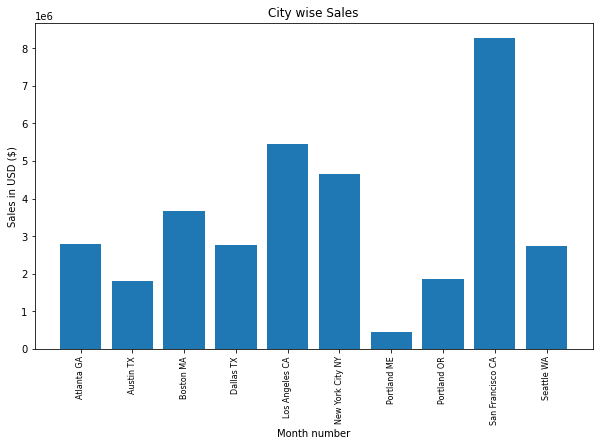

In [28]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.figure(figsize=(10,6))
plt.title('City wise Sales')
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

on Y-axis numbers are like 1,2,3 but they are in multiple of 10^6 and bigger the city big sales
now lets get to know about at what time of day people doing shopping.

Till yet we had seen sales by months and Cities. Now let's try to find out that at what time of day sales are high, for that we need hours column.

In [29]:
# Add hour column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()

<ipython-input-29-f06027b33b15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
<ipython-input-29-f06027b33b15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute
<ipython-input-29-f06027b33b15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


In [ ]:
# all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
# all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute, str to date time then get hour column

<AxesSubplot:xlabel='Hour', ylabel='count'>

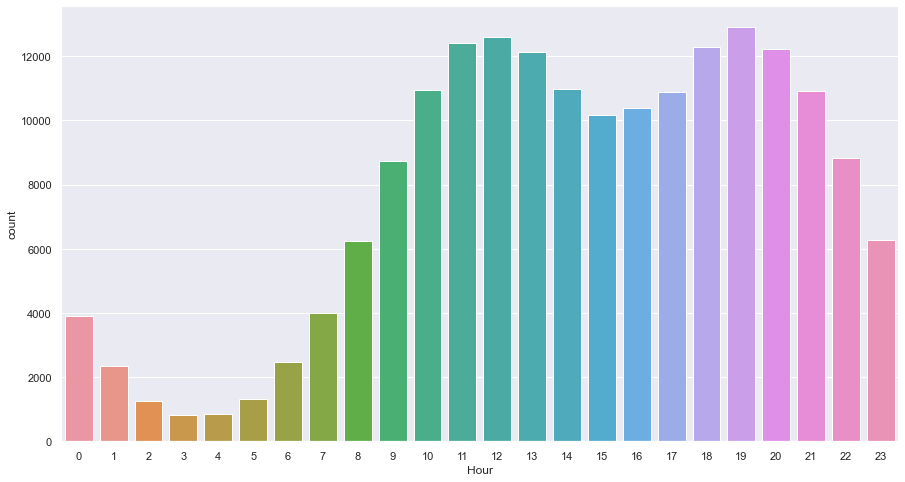

In [30]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x = all_data.Hour)

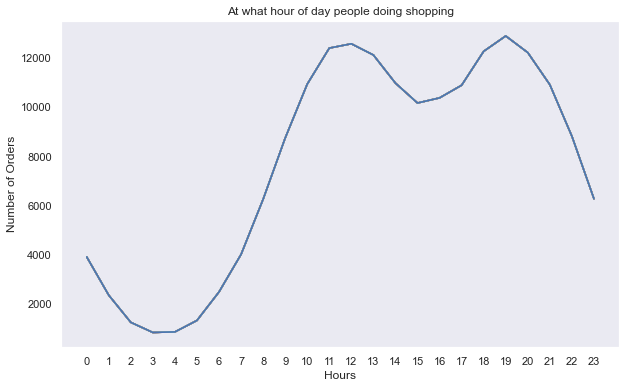

In [31]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.figure(figsize=(10,6))
plt.title('At what hour of day people doing shopping')
plt.plot(keys, all_data.groupby(['Hour']).count())
plt.xticks(keys)
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.grid()
plt.show()

As we can see at 11,12 AM and 1PM we are having peak, cause people coming to shopping after having breakfast  doing chores and
after 1PM it's going towards local minima cause people having lunch and taking rest.
And again 6-8PM we are observing peak, it can be due to the fact that people are coming after work and it's evening. 

In [32]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Now see about products which are often sold together

In [33]:

# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# keep = false, keeping all instances

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


<ipython-input-33-b85136cf199e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [34]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18,1,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25,1,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49,1,"Google Phone,USB-C Charging Cable"


In [35]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [36]:
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [37]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

In [38]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [39]:
#count
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [40]:
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


As we can see iPhone, Lightning Charging Cable are sold together 1005 times and Google Phone, USB-C Charging Cable by 987 

In [41]:
# for 3 item
count1 = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count1.update(Counter(combinations(row_list, 3)))

for key,value in count1.most_common(10):
    print(key, value)    

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


What product sold the most

In [42]:
product_group = all_data.groupby('Product')

In [43]:
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


here we can use Quantity Ordered or Sales to do analysis 

In [44]:
quantity_ordered = product_group.sum()['Quantity Ordered']

In [45]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [46]:
Sales = product_group.sum()['Sales']

In [47]:
Sales

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

Let's plot Product analysis 

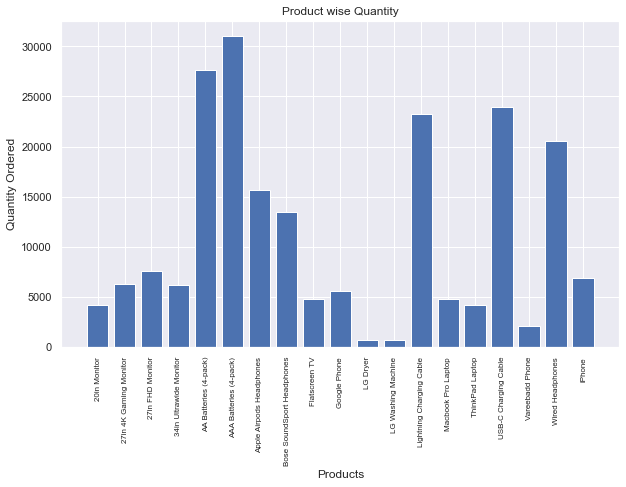

In [48]:
Products = [Product for Product, df in product_group]

plt.figure(figsize=(10,6))
plt.bar(Products, quantity_ordered)
plt.title('Product wise Quantity')
plt.xticks(Products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

AAA batteries are being sold more may be cause of low cost and charging cables and headphones too follow same pattern 

In [49]:
# let's get price to and comapre it with sales
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

In [50]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-51-873dac49f2cb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation='vertical', size=8)
<ipython-input-51-873dac49f2cb>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


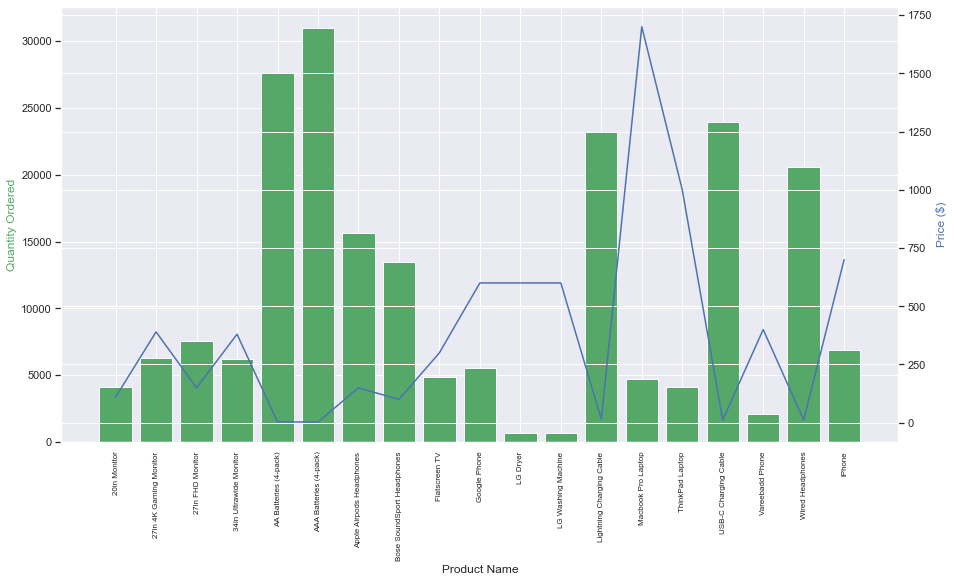

<Figure size 1080x720 with 0 Axes>

In [51]:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15,10))

ax2 = ax1.twinx()
ax1.bar(Products, quantity_ordered, color='g')
ax2.plot(Products, prices, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Products, rotation='vertical', size=8)

fig.show()

so as we can see price are low for AAA bateries, headphones, charging cables and result of that more unit got sold

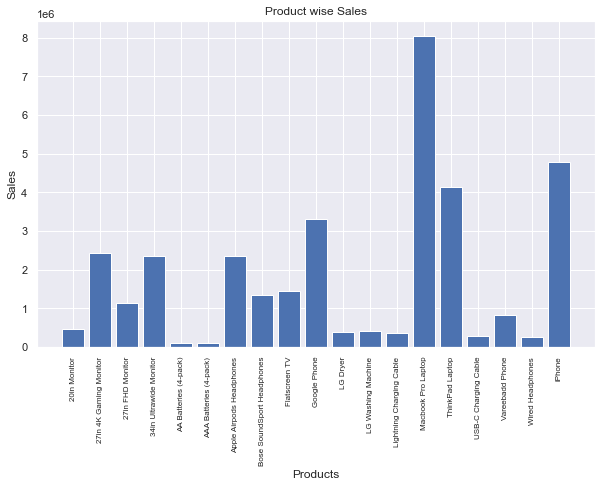

In [52]:
# Let's observe sales to
Products = [Product for Product, df in product_group]

plt.figure(figsize=(10,6))
plt.bar(Products, Sales)
plt.title('Product wise Sales')
plt.xticks(Products, rotation='vertical', size=8)
plt.ylabel('Sales')
plt.xlabel('Products')
plt.show()

<ipython-input-53-7aaed2b57745>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation='vertical', size=8)
<ipython-input-53-7aaed2b57745>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


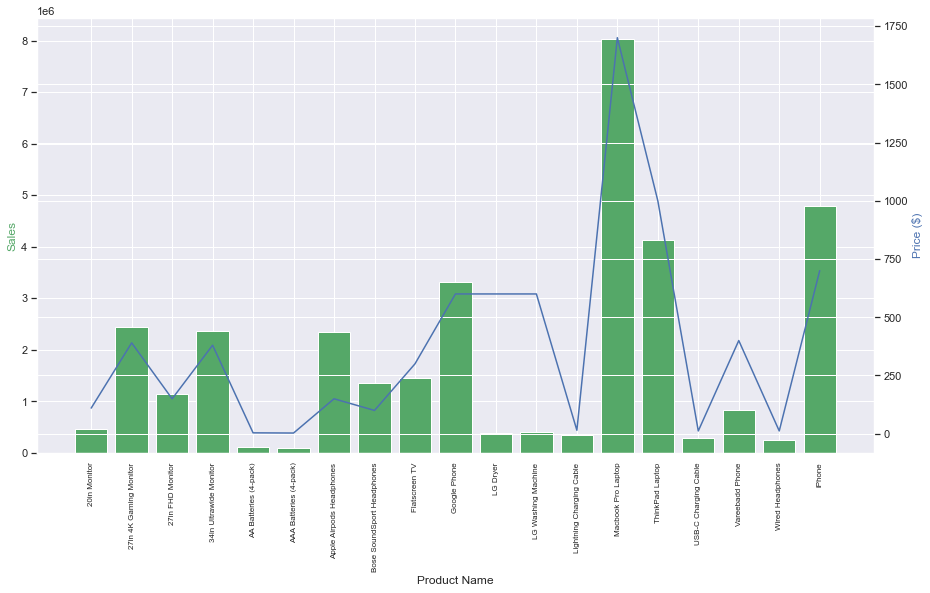

<Figure size 1080x720 with 0 Axes>

In [53]:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(15,10))

ax2 = ax1.twinx()
ax1.bar(Products, Sales, color='g')
ax2.plot(Products, prices, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Sales', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Products, rotation='vertical', size=8)

fig.show()

here we can see price and sales almost going hand to hand, higher the price higher the sales.

In [54]:
df2
# we can also use Association_Rule_Mining_Apriori 

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [55]:
from apyori import apriori

In [56]:
records = df2.Grouped

In [57]:
records

3                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
32                      AAA Batteries (4-pack),Google Phone
119           Lightning Charging Cable,USB-C Charging Cable
                                ...                        
186781    Apple Airpods Headphones,Apple Airpods Headphones
186783    iPhone,Lightning Charging Cable,Lightning Char...
186791         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
Name: Grouped, Length: 7136, dtype: object

In [58]:
records1=df2[['Grouped']].to_numpy()

In [59]:
records1

array([['Google Phone,Wired Headphones'],
       ['Google Phone,USB-C Charging Cable'],
       ['Bose SoundSport Headphones,Bose SoundSport Headphones'],
       ...,
       ['34in Ultrawide Monitor,AA Batteries (4-pack)'],
       ['Wired Headphones,AAA Batteries (4-pack)'],
       ['Google Phone,USB-C Charging Cable']], dtype=object)

In [60]:
association_rules = apriori(records1,min_length=2)
association_results = list(association_rules)

In [61]:
len(association_results)

2

In [62]:
association_results

[RelationRecord(items=frozenset({'Google Phone,USB-C Charging Cable'}), support=0.11995515695067265, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Google Phone,USB-C Charging Cable'}), confidence=0.11995515695067265, lift=1.0)]),
 RelationRecord(items=frozenset({'iPhone,Lightning Charging Cable'}), support=0.12359865470852018, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'iPhone,Lightning Charging Cable'}), confidence=0.12359865470852018, lift=1.0)])]

We just got 2 sets, let's try to put them in a table. we are getting an error "'int' object is not subscriptable"

In [74]:
results = []
for item in association_results:
    
    pair = item[0]
    items = [x for x in pair]
    
    value0 = str(items[0])
    value1 = str(items[1])

    value2 = str(item[1])[:7]

    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    rows = (value0, value1,value2,value3,value4)
    results.append(rows)
    
labels = ['Product 1','Product 2','Support','Confidence','Lift']
Product_suggestion = pd.DataFrame(results, columns = labels)

IndexError: list index out of range

Error is coming : So what happening is that items = 'iPhone,Lightning Charging Cable', it's a single string and                 items[0] = iPhone,Lightning Charging Cable, cause it was a single string and items[1] is empty.

Why is it happening because in the records1,df2, and df datasets these observation were taken as a single string. So the apriori happened on single setlength dataset means it determine the support, confidense, and lift as an individual not as a pair like it used to happen. 
So we need to gather data in proper format like this 'iPhone','Lightning Charging Cable' as we can see 2 strings separated by comma and then code will run.  

In [64]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


In [65]:
all_data.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

plt.subplots(figsize = (40,10))
sns.histplot(x=all_data.Sales)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

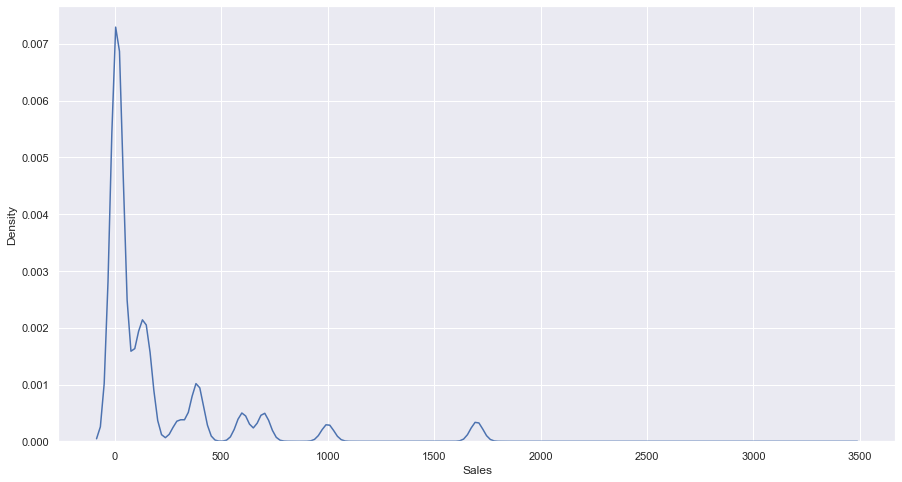

In [66]:
sns.kdeplot(all_data['Sales'])